Import required modules, libraries and Shakespearean text for project

In [121]:
from __future__ import print_function
import nltk
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.tokenize import TreebankWordTokenizer
import urllib.request
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from textblob import TextBlob
from nltk.util import ngrams
from collections import Counter
from operator import itemgetter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse.linalg import svds
import gensim
from functools import reduce
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pandas as pd
import os
import string
import re
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
%matplotlib inline

Much_Ado = urllib.request.urlopen('http://www.textfiles.com/etext/AUTHORS/SHAKESPEARE/shakespeare-much-3.txt').read()
Much_Ado_lines = Much_Ado.decode('utf8')# Much Ado About Nothing
Tempest = urllib.request.urlopen('http://www.textfiles.com/etext/AUTHORS/SHAKESPEARE/shakespeare-tempest-4.txt').read()
Tempest_lines = Tempest.decode('utf8')# The Tempest
Richard = urllib.request.urlopen('http://www.textfiles.com/etext/AUTHORS/SHAKESPEARE/shakespeare-tragedy-58.txt').read()
Richard_lines = Richard.decode('utf8') # Richard III
Winter = urllib.request.urlopen('http://www.textfiles.com/etext/AUTHORS/SHAKESPEARE/shakespeare-winters-19.txt').read()
Winter_lines = Winter.decode('utf8') # A Winter's Tale
Merchant = urllib.request.urlopen('http://www.textfiles.com/etext/AUTHORS/SHAKESPEARE/shakespeare-merchant-5.txt').read()
Merchant_lines = Merchant.decode('utf8') # The MErchant of Venice
Midsummer = urllib.request.urlopen('http://www.textfiles.com/etext/AUTHORS/SHAKESPEARE/shakespeare-midsummer-16.txt').read()
Midsummer_lines = Midsummer.decode('utf8') # A Midsummer Night's Dream  
Measure = urllib.request.urlopen('http://www.textfiles.com/etext/AUTHORS/SHAKESPEARE/shakespeare-measure-13.txt').read()
Measure_lines = Measure.decode('utf8') # Measure for Measure
Macbeth = urllib.request.urlopen('http://www.textfiles.com/etext/AUTHORS/SHAKESPEARE/shakespeare-macbeth-46.txt').read()
Macbeth_lines = Macbeth.decode('utf8') # Macbeth
Hamlet = urllib.request.urlopen('http://www.textfiles.com/etext/AUTHORS/SHAKESPEARE/shakespeare-hamlet-25.txt').read()
Hamlet_lines = Hamlet.decode('utf8') # Hamlet
Cymbeline = urllib.request.urlopen('http://www.textfiles.com/etext/AUTHORS/SHAKESPEARE/shakespeare-cymbeline-17.txt').read()
Cymbeline_lines = Cymbeline.decode('utf8') # Cymberline
Jacobian_Plays = Cymbeline_lines+Measure_lines+Winter_lines
Early_Com = Much_Ado_lines+Midsummer_lines+Merchant_lines
Tragedies = Richard_lines+Hamlet_lines+Macbeth_lines

Introduce stopwords, including a corpus of Shakespearean stopwords.

In [106]:
stop = stopwords.words('english')
stop += ['|','[',']','Messenger','shall','must','would','Would','Don','Pedro','John','Claudio','Benedick',
         'Leonato','Antonio','Balthazar','Conrade','Borachio','Francis','Dogberry','Verges'
         'Sexton','sexton','Hero','Beatrice','Margaret','Ursula','Alonso','Sebastian','Prospero','Antonio',
         'Fernando','Gonzalo','Francisco','Caliban','Trinculo','Stephano','Boatswain','Mariners',
         'Miranda', 'Ariel','Iris','Ceres','Juno','Nymphs', 'Edward','Richard','George','Clarence','Henry','Cardinal',
         'Bouchier','Thomas', 'Rotherham', 'John', 'Morton', 'Hastings','Lord','Earl','Lovel','Oxford','Stanley',
         'Ratcliff','Vaughan','Rivers','Buckingham','Surrey''James','Tyrell','Blount','Ratcliff','Herbert','Lady',
         'Anne','Margaret','Elizabeth','Duchess','York','Robert', 'Brankenbury','Christopher','Urswick','Leontes',
         'Mamillius', 'Camillo', 'Antigonus','Cleomenes','Dion','Polixenes','Florizel','Archidamus','Shepherd','Clown',
         'Autolycus','Mariner','A Gaoler','Hermione','Perdita','Paulina','Emilia','Mopsa','Dorcas',
         'Shylock','Portia','Bassanio','Antonio','Gratiano','Launcelot','Gobbo','Solanio','Salarino','Salerio','Stephano', 
         'Jessica','Duke of Venice','Nerissa','Prince of Morocco', 'Price of Arragon', 'Duke', 'Lorenzo',
         'Tubal', 'Balzarina','Balthazar','Titania','Oberon','Hippolyta','Hermia','Puck','Lysander','Nick Bottom','Helena',
         'Egeus','Demetrius','Peter','Quince','Philostrate','Robin','Starveling','Francis Flute','Tom', 'Snout','Snug','Theseus',
         'Cobweb','Lady Macbeth','Banquo','King Duncan','Macduff','Macbeth','Fleance','Young','Siward','Malcolm','Donalbain',
         'Third Murderer','Lady Macduff','Seyton','Witch #3','Witch #1','Witch #2','Murderer','Murderer','Doctor',
         'Ross','Angus','Old Man','Child #1','Lennox','Captain','Porter','Gentlewoman','Servant','Claudius','Hamlet','Polonius',
         'Horatio','Laertes','Lucianus','Voltimand','Cornelius','Rosencrantz','Guildenstern','Osric','Marcellus','Bernardo',
         'Francisco','Reynaldo','First Player','Player King','Player Queen','First Clown','Second Clown','Fortinbras',
         'First Ambassador','Gertrude','Ophelia','Imogen','Iachimo','Pisanio','Belarius','Philario','Cloten','Caius Lucius','Posthumus Leonatus',
         'Arviragus','Soothsayer','Helen','Cymbeline','Guiderius','Pyramus','Thisby','c','h','v','Duke Od Venice','Brabantio', 'First Senator','Second Senator',
         'Gratiano','Lodovico','Othello','Cassio','Iago','Roderigo','Montano','Clown','Desdemona','Emilia','Sailor','First Officer','Messenger',
         'First Gentleman','Second Gentleman','Third Gentleman','First Musician']
 
stop += open('new_stop.txt','r').readlines()
stop = [i.replace('\n',"") for i in stop]
stop = [x.lower() for x in stop]

Create function to clean text

In [107]:
def MySentences(Object):
    vocab = []
    lemmatizer = nltk.stem.WordNetLemmatizer()
    Object = lemmatizer.lemmatize(Object[Object.find("ACT"):])
    for line in sent_tokenize(Object):
        line = re.sub('[A-Z]{2,}',' ',line)
        line = re.sub("\[[^\]]*\]","",line)
        line= re.sub('[%s]' % re.escape(string.punctuation), '', line)
        line = line.lower()
        vocab.append(line.split())
    vocab_2 = [] 
    for i in vocab:
        vocab_2.append(list(filter(lambda x: x not in stop, i)))
    return vocab_2

Create function applying Word2Vec to text

In [108]:
def W2V(play,Act):
    return gensim.models.Word2Vec(MySentences(str(''.join(Find_Acts(play)[Act]))),size=100,min_count=1,workers=2)

Create function separating text into acts

In [109]:
def Find_Acts(play):
    play_Acts = {}
    play_Acts2 = {}
    i = 0
    b = 0
    for x in range(1,play.count('ACT')+1):
        i = play.find("ACT",+ b)
        b = play.find("ACT", i + 1)
        play_Acts[x] = play[i:b]
    for i in ['ACT I','ACT II','ACT III','ACT IV','ACT V']:
        play_Acts2[i] = []
    for k,v in play_Acts.items():
        for i,j in play_Acts2.items():
            if i in v.split('\n'):
                play_Acts2[i].append(v)
    return play_Acts2
  

Create function to plot multiple plays in space using T-SNE

In [112]:
def tsne_plot(model,label):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=250)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    return plt.scatter(x,y, label= label),plt.legend()


/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


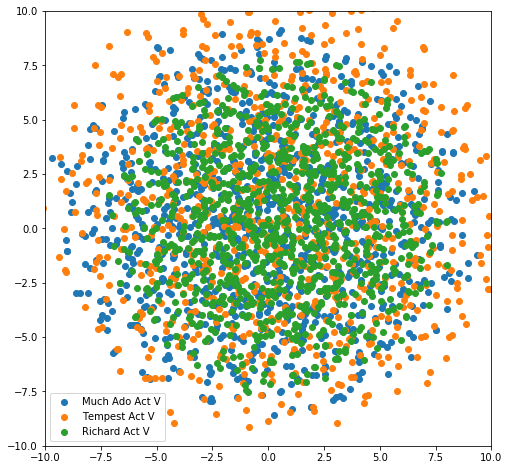

In [102]:
plt.figure(figsize=(8, 8)) 
tsne_plot(W2V(Much_Ado_lines,'ACT V'),'Much Ado Act V')
tsne_plot(W2V(Tempest_lines,'ACT V'),'Tempest Act V')
tsne_plot(W2V(Richard_lines,'ACT V'),'Richard Act V')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


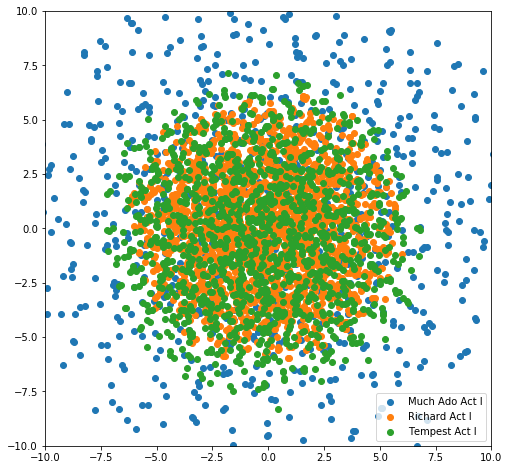

In [87]:
plt.figure(figsize=(8, 8)) 
tsne_plot(W2V(Much_Ado_lines,'ACT I'),'Much Ado Act I')
tsne_plot(W2V(Richard_lines,'ACT I'),'Richard Act I')
tsne_plot(W2V(Tempest_lines,'ACT I'),'Tempest Act I')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


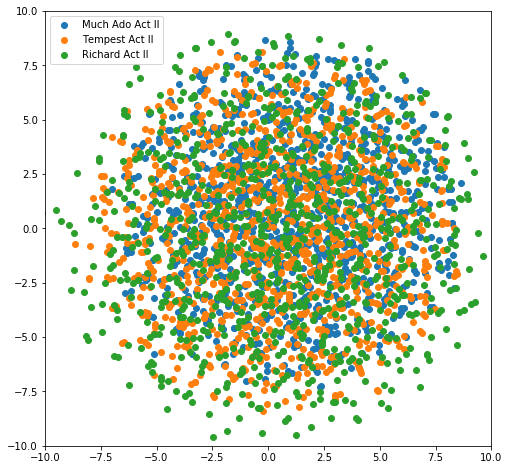

In [134]:
plt.figure(figsize=(8, 8)) 
tsne_plot(W2V(Much_Ado_lines,'ACT II'),'Much Ado Act II')
tsne_plot(W2V(Tempest_lines,'ACT II'),'Tempest Act II')
tsne_plot(W2V(Richard_lines,'ACT II'),'Richard Act II')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


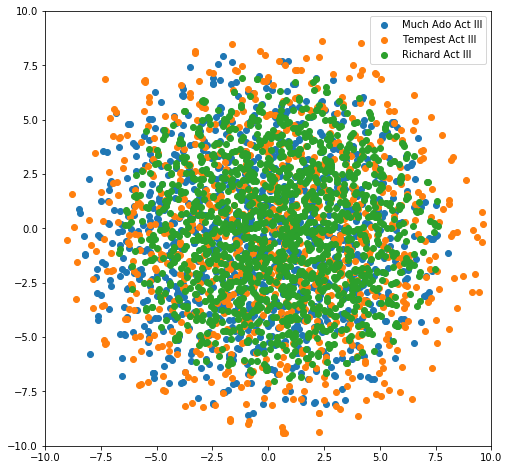

In [135]:
plt.figure(figsize=(8, 8)) 
tsne_plot(W2V(Much_Ado_lines,'ACT III'),'Much Ado Act III')
tsne_plot(W2V(Tempest_lines,'ACT III'),'Tempest Act III')
tsne_plot(W2V(Richard_lines,'ACT III'),'Richard Act III')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


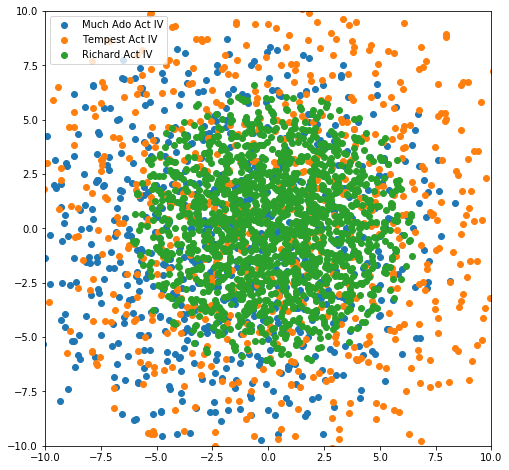

In [136]:
plt.figure(figsize=(8, 8)) 
tsne_plot(W2V(Much_Ado_lines,'ACT IV'),'Much Ado Act IV')
tsne_plot(W2V(Tempest_lines,'ACT IV'),'Tempest Act IV')
tsne_plot(W2V(Richard_lines,'ACT IV'),'Richard Act IV')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


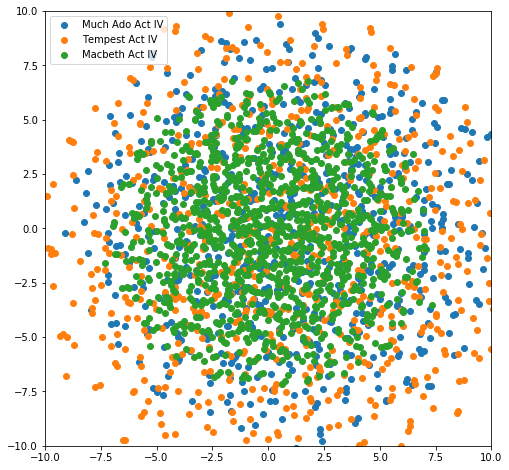

In [137]:
plt.figure(figsize=(8, 8)) 
tsne_plot(W2V(Much_Ado_lines,'ACT IV'),'Much Ado Act IV')
tsne_plot(W2V(Tempest_lines,'ACT IV'),'Tempest Act IV')
tsne_plot(W2V(Macbeth_lines,'ACT IV'),'Macbeth Act IV')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


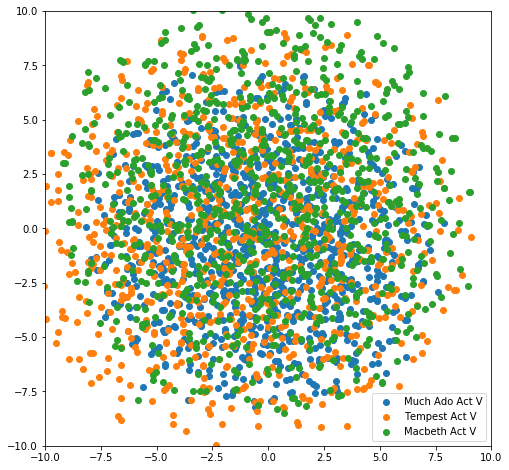

In [138]:
plt.figure(figsize=(8, 8)) 
tsne_plot(W2V(Much_Ado_lines,'ACT V'),'Much Ado Act V')
tsne_plot(W2V(Tempest_lines,'ACT V'),'Tempest Act V')
tsne_plot(W2V(Macbeth_lines,'ACT V'),'Macbeth Act V')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


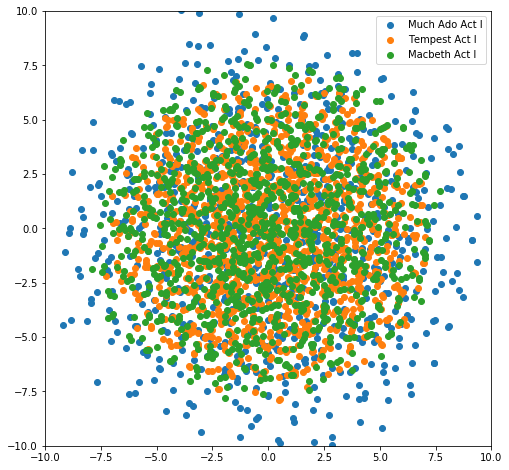

In [139]:
plt.figure(figsize=(8, 8)) 
tsne_plot(W2V(Much_Ado_lines,'ACT I'),'Much Ado Act I')
tsne_plot(W2V(Tempest_lines,'ACT I'),'Tempest Act I')
tsne_plot(W2V(Macbeth_lines,'ACT I'),'Macbeth Act I ')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


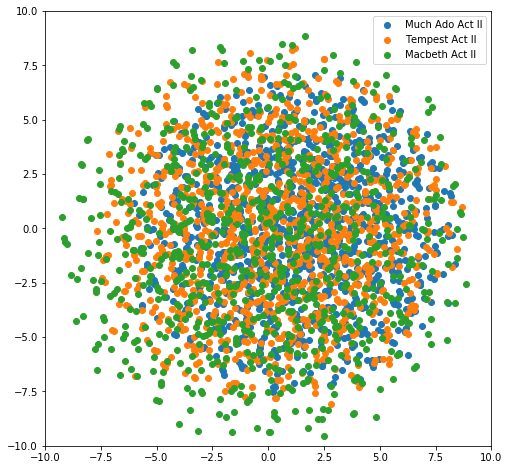

In [140]:
plt.figure(figsize=(8, 8)) 
tsne_plot(W2V(Much_Ado_lines,'ACT II'),'Much Ado Act II')
tsne_plot(W2V(Tempest_lines,'ACT II'),'Tempest Act II')
tsne_plot(W2V(Macbeth_lines,'ACT II'),'Macbeth Act II')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


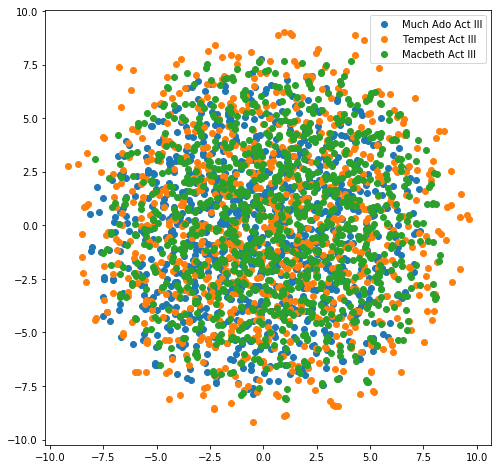

In [125]:
plt.figure(figsize=(8, 8)) 
tsne_plot(W2V(Much_Ado_lines,'ACT III'),'Much Ado Act III')
tsne_plot(W2V(Tempest_lines,'ACT III'),'Tempest Act III')
tsne_plot(W2V(Macbeth_lines,'ACT III'),'Macbeth Act III')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


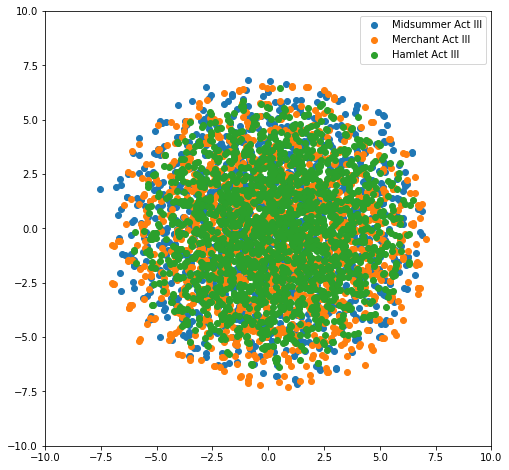

In [141]:
plt.figure(figsize=(8, 8)) 
tsne_plot(W2V(Midsummer_lines,'ACT III'),'Midsummer Act III')
tsne_plot(W2V(Merchant_lines,'ACT III'),'Merchant Act III')
tsne_plot(W2V(Hamlet_lines,'ACT III'),'Hamlet Act III')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


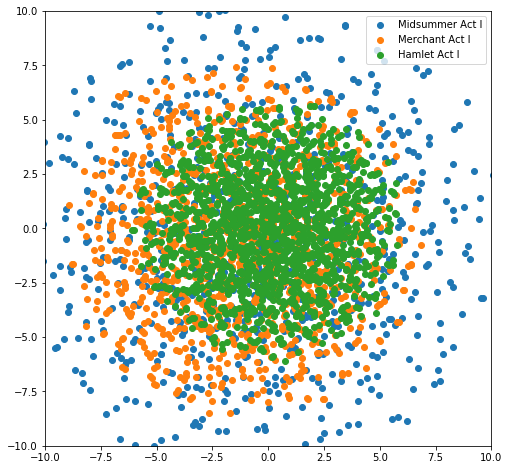

In [143]:
plt.figure(figsize=(8, 8)) 
tsne_plot(W2V(Midsummer_lines,'ACT I'),'Midsummer Act I')
tsne_plot(W2V(Merchant_lines,'ACT I'),'Merchant Act I')
tsne_plot(W2V(Hamlet_lines,'ACT I'),'Hamlet Act I')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


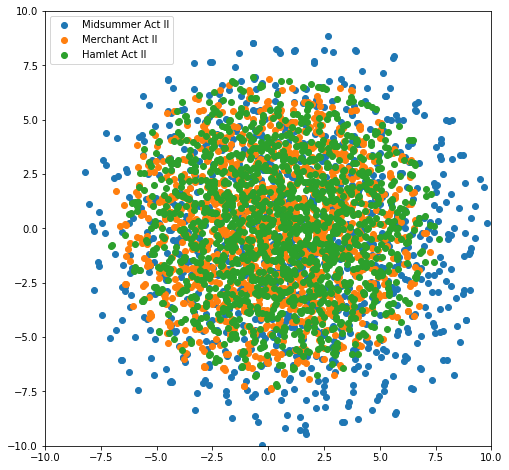

In [144]:
plt.figure(figsize=(8, 8)) 
tsne_plot(W2V(Midsummer_lines,'ACT II'),'Midsummer Act II')
tsne_plot(W2V(Merchant_lines,'ACT II'),'Merchant Act II')
tsne_plot(W2V(Hamlet_lines,'ACT II'),'Hamlet Act II')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


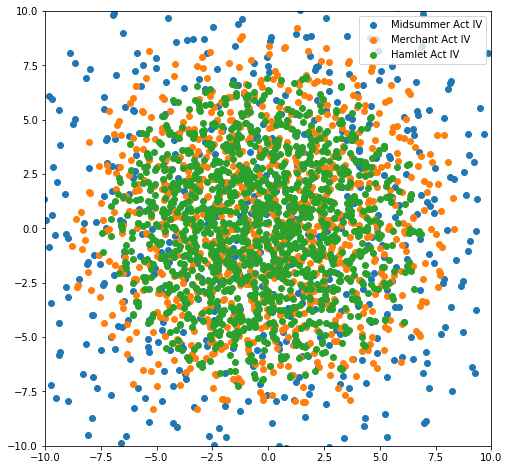

In [145]:
plt.figure(figsize=(8, 8)) 
tsne_plot(W2V(Midsummer_lines,'ACT IV'),'Midsummer Act IV')
tsne_plot(W2V(Merchant_lines,'ACT IV'),'Merchant Act IV')
tsne_plot(W2V(Hamlet_lines,'ACT IV'),'Hamlet Act IV')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


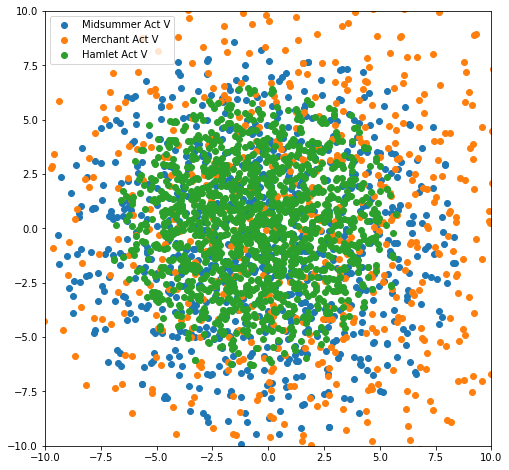

In [146]:
plt.figure(figsize=(8, 8)) 
tsne_plot(W2V(Midsummer_lines,'ACT V'),'Midsummer Act V')
tsne_plot(W2V(Merchant_lines,'ACT V'),'Merchant Act V')
tsne_plot(W2V(Hamlet_lines,'ACT V'),'Hamlet Act V')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

Plot words for Hamlet with labels 

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


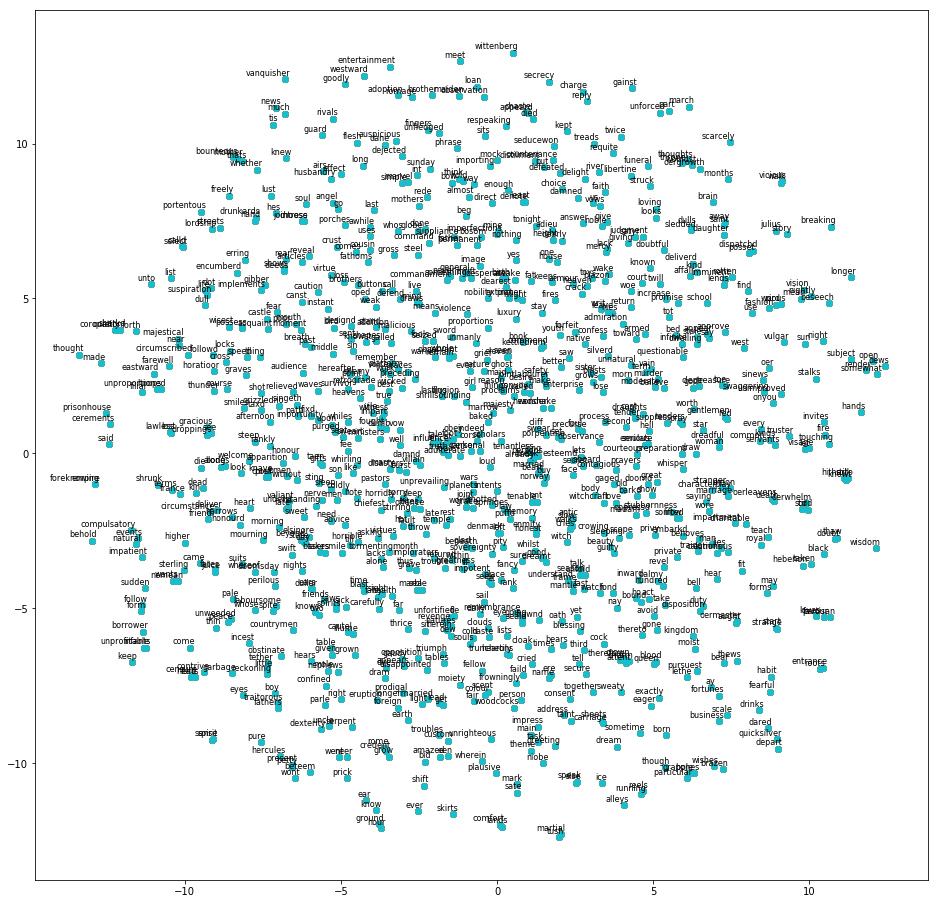

In [120]:
def filtered_model(play,Act):
    sentences = MySentences(str(''.join(Find_Acts(play)[Act])))
    b_o_w = defaultdict(int)
    for i in sentences:
        for j in i:
            b_o_w[j]+=1 
        
    b_o_w = {k:v for k,v in b_o_w.items() if v >=1}
    for sentence in sentences:
        for word in sentence:
            if word in b_o_w.keys():
                sentence.remove(word)
    return gensim.models.Word2Vec(sentences,size=100,min_count=1,workers=2)

def tsne_plot_with_labels(model,label):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=200)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    plt.figure(figsize = (16,16))
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    for i in range(len(x)):
        plt.scatter(x,y)
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',fontsize = 8)
    plt.show()
        

tsne_plot_with_labels(filtered_model(Hamlet_lines,'ACT I'),'Hamlet ACT I')